# Titanic Challenge using Decision Trees

Some assumptions to start with
- "Women and children first" -> sex and age probably have a lot to do with who survived
- Social standing (ie. class) might also

## Prerequisites

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# do not show warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

combined = [train, test]

## Exploring

In [4]:
# check which features we have available
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#type(train)

In [6]:
# check dimensions
train.shape

(891, 12)

In [7]:
# check data types of different columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# see first few values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# take random sample of data
train.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C


In [10]:
# summary of numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# summary of categorical data
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ivanoff, Mr. Kanio",male,1601,G6,S
freq,1,577,7,4,644


In [12]:
# check how many missing values different columns have
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# check how big % survived based on sex
# select two columns, aggregate results, take mean and sort values just in case

train[["Sex", "Survived"]].groupby(by = "Sex", as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Wrangling

I'll leave more advanced feature engineering for later. Now, let' just:
- fill missing values for age
- drop unnecessary columns
- replace male and female values with 0 and 1

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# fill missing values of age
train["Age"].fillna(train.Age.median(), inplace = True)

In [16]:
# drop unnecessary columns
# loop through both data frames and drop columns
for df in combined:
    df.drop("Name", axis = 1, inplace=True)
    df.drop("SibSp", axis = 1, inplace=True)
    df.drop("Parch", axis = 1, inplace=True)
    df.drop("Ticket", axis = 1, inplace=True)
    df.drop("Fare", axis = 1, inplace=True)
    df.drop("Cabin", axis = 1, inplace=True)
    df.drop("Embarked", axis = 1, inplace=True)

In [17]:
# convert male and female to 0 and 1
train["Sex"] = train["Sex"].map( {"female": 1, "male":0}).astype(int)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,0,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,0,35.0


## Visualization

To be updated...

In [19]:
import matplotlib.pyplot as plt

(array([  54.,   46.,  177.,  346.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

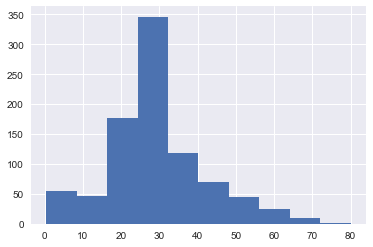

In [20]:
plt.hist(train.Age)

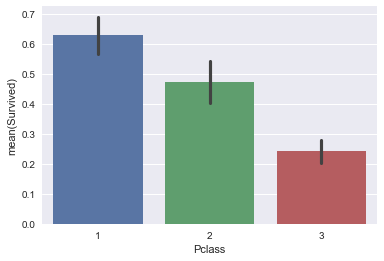

In [21]:
sns.barplot(x="Pclass", y = "Survived", data = train)

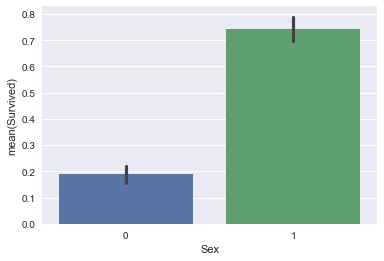

In [22]:
sns.barplot(y="Survived", x = "Sex", data = train)

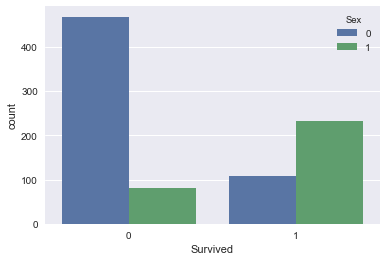

In [23]:
sns.countplot(x = "Survived", hue = "Sex", data = train)

## Training

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

C:\Users\Mikko\Anaconda3\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
tree = DecisionTreeClassifier()

x = train.drop(["Survived", "PassengerId"], axis = 1)
y = train["Survived"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .3)

In [26]:
tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Performance

In [27]:
tree.score(x, y)

0.877665544332211